In [23]:
import pandas as pd
import os
import ast
from collections import Counter

In [5]:
# 定义各朝代对应的文件路径
dynasty_files = {
    "liaojin": [
        "output_liaojin.csv",
        "output_liaojin_museum.csv"
    ],
    "suitang": [
        "output_suitang.csv",
        "output_suitang_museum.csv"
    ],
    "song": [
        "book_song.csv",
        "museum_song1.csv"
    ],
    "ming": [
        "book_ming.csv",
        "museum_ming1.csv"
    ],
    "yuan": [
        "book_yuan.csv",
        "museum_yuan1.csv"
    ],
    "qing": [
        "book_qing.csv",
        "museum_qing1.csv"
    ]
}


In [9]:
combined_dfs = []

for dynasty, file_list in dynasty_files.items():
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path)
            print(f"读取成功: {file_path}, 行数: {len(df)}")
            # 统一列名
            if 'label' in df.columns and 'labels' not in df.columns:
                df.rename(columns={'label': 'labels'}, inplace=True)
            elif 'labels' not in df.columns:
                df['labels'] = None  # 如果都没有，填None列
            df['labels'] = df['labels'].astype(str)
            df['source_file'] = os.path.basename(file_path)
            df['dynasty'] = dynasty
            combined_dfs.append(df)
        except Exception as e:
            print(f"读取失败: {file_path}, 错误: {e}")

# 检查收集到多少 DataFrame
if not combined_dfs:
    raise ValueError("❗ 没有成功加载任何文件，请检查路径和文件内容！")

all_combined = pd.concat(combined_dfs, ignore_index=True)
all_combined

读取成功: output_liaojin.csv, 行数: 62
读取成功: output_liaojin_museum.csv, 行数: 55
读取成功: output_suitang.csv, 行数: 77
读取成功: output_suitang_museum.csv, 行数: 90
读取成功: book_song.csv, 行数: 84
读取成功: museum_song1.csv, 行数: 47
读取成功: book_ming.csv, 行数: 122
读取成功: museum_ming1.csv, 行数: 75
读取成功: book_yuan.csv, 行数: 87
读取成功: museum_yuan1.csv, 行数: 58
读取成功: book_qing.csv, 行数: 182
读取成功: museum_qing1.csv, 行数: 314


,ID,boxes,labels,source_file,dynasty
0,liaojin014,"[{'box_2d': [453, 443, 738, 567], 'label': 'fi...","[5, 0, 0, 1]",output_liaojin.csv,liaojin
1,liaojin028,"[{'box_2d': [221, 770, 689, 883], 'label': '翟鸟...","[0, 0, 0, 0, 0, 0, 0, 0]",output_liaojin.csv,liaojin
2,liaojin029,"[{'box_2d': [112, 431, 728, 1000], 'label': '翟...","[0, 0, 1]",output_liaojin.csv,liaojin
3,liaojin001,"[{'box_2d': [21, 287, 753, 810], 'label': 'cra...","[0, 3, 3]",output_liaojin.csv,liaojin
4,liaojin041_restored,"[{'box_2d': [560, 97, 835, 367], 'label': 'Pea...","[0, 1, 1, 0, 1, 0, 1]",output_liaojin.csv,liaojin
...,...,...,...,...,...
1248,黑缎地镶绣梅花纹袖头女褂_2,"[{'box_2d': [152, 747, 350, 879], 'label': 'fl...","[1, 1, 3, 3]",museum_qing1.csv,qing
1249,黑缎彩绣团花牡丹女衣,"[{'box_2d': [392, 206, 504, 291], 'label': '牡丹...","[1, 1, 3, 1, 1, 1, 3, 1, 1, 1]",museum_qing1.csv,qing
1250,黑缎绦带衣领镶边,NaN,[],museum_qing1.csv,qing
1251,黑缎钉线绣花蝶袖头,"[{'box_2d': [278, 338, 366, 394], 'label': 'bu...","[0, 1, 0, 1]",museum_qing1.csv,qing


In [41]:
def extract_box_labels(boxes_str):
    try:
        boxes_list = ast.literal_eval(boxes_str)
        return [box['label'] for box in boxes_list]
    except Exception:
        return []

# Helper：解析 labels 列（字符串转列表）
def extract_label_numbers(label_list_str):
    try:
        parsed = ast.literal_eval(label_list_str)
        if isinstance(parsed, list):
            return parsed
    except Exception:
        return []
    return []

In [43]:
boxes_stats = {}
labels_stats = {}

# 按朝代分组处理
for dynasty, group_df in all_combined.groupby('dynasty'):
    # boxes 统计
    box_labels = []
    for b in group_df['boxes']:
        box_labels.extend(extract_box_labels(b))
    boxes_stats[dynasty] = Counter(box_labels)
    
    # labels 统计
    label_numbers = []
    for lst in group_df['labels']:
        label_numbers.extend(extract_label_numbers(lst))
    labels_stats[dynasty] = Counter(label_numbers)

In [45]:
all_box_labels = []
for b in all_combined['boxes']:
    all_box_labels.extend(extract_box_labels(b))
boxes_stats['all'] = Counter(all_box_labels)

all_label_numbers = []
for lst in all_combined['labels']:
    all_label_numbers.extend(extract_label_numbers(lst))
labels_stats['all'] = Counter(all_label_numbers)

# 转为 DataFrame 展示
boxes_df = pd.DataFrame(boxes_stats).fillna(0).astype(int)
labels_df = pd.DataFrame(labels_stats).fillna(0).astype(int)

In [47]:
boxes_df

,liaojin,ming,qing,song,suitang,yuan,all
figure,3,0,3,0,2,0,8
deer,16,0,5,2,5,5,33
mountain tree,1,0,0,0,0,0,1
翟鸟,10,0,0,0,0,6,16
plant,1,7,2,0,8,0,18
...,...,...,...,...,...,...,...
月亮,0,0,0,0,0,1,1
Repeating Abstract Motifs,0,0,0,0,0,1,1
麒麟纹,0,0,0,0,0,1,1
方搭纹,0,0,0,0,0,1,1


In [49]:
labels_df 

,liaojin,ming,qing,song,suitang,yuan,all
5,19,39,240,20,39,27,384
0,201,165,1014,74,268,314,2036
1,199,639,2655,498,395,666,5052
3,58,117,343,13,172,149,852
2,63,504,1272,73,54,100,2066
4,2,51,151,43,79,18,344
None,0,30,0,0,0,58,88
0: 5,0,0,1,0,0,0,1
1: 5,0,0,1,0,0,0,1
2: 0,0,0,1,0,0,0,1


/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_1430/1926314753.py:15: UserWarning: Glyph 26421 (\N{CJK UNIFIED IDEOGRAPH-6735}) missing from current font.
  plt.tight_layout()
/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_1430/1926314753.py:15: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  plt.tight_layout()
/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_1430/1926314753.py:15: UserWarning: Glyph 32441 (\N{CJK UNIFIED IDEOGRAPH-7EB9}) missing from current font.
  plt.tight_layout()
/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_1430/1926314753.py:15: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from current font.
  plt.tight_layout()
/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_1430/1926314753.py:15: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pyl

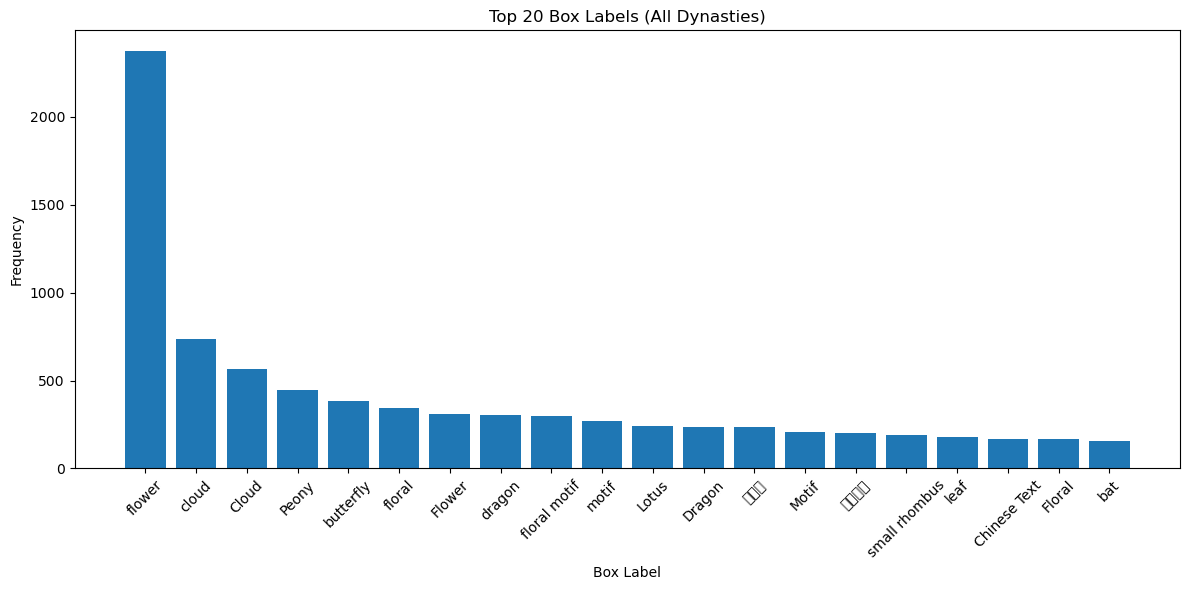

In [61]:
all_box_labels = []
for b in all_combined['boxes']:
    all_box_labels.extend(extract_box_labels(b))

boxes_counter = Counter(all_box_labels)
top_20_boxes = boxes_counter.most_common(20)
box_names, box_counts = zip(*top_20_boxes)

plt.figure(figsize=(12, 6))
plt.bar(box_names, box_counts)
plt.title("Top 20 Box Labels (All Dynasties)")
plt.xlabel("Box Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

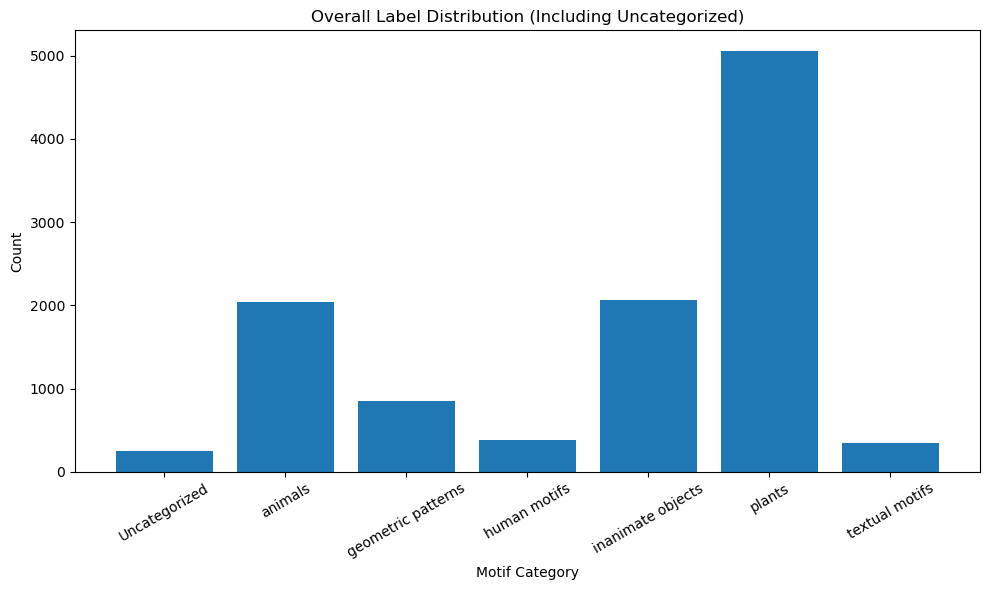

In [59]:
# 汇总所有数字：合法的归入 0–5，其他归入 'Uncategorized'
category_map = {
    0: "animals",
    1: "plants",
    2: "inanimate objects",
    3: "geometric patterns",
    4: "textual motifs",
    5: "human motifs"
}

# 准备汇总容器
final_counter = Counter()

for k, v in labels_stats['all'].items():
    if isinstance(k, int) and k in category_map:
        final_counter[category_map[k]] += v
    else:
        final_counter['Uncategorized'] += v

# 排序并准备画图
sorted_items = sorted(final_counter.items(), key=lambda x: x[0])  # 按名字排
categories, counts = zip(*sorted_items)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.title("Overall Label Distribution (Including Uncategorized)")
plt.xlabel("Motif Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Converting boxes' label names to English

In [80]:
import pandas as pd
import ast

# 1️⃣ 从 all_combined 中提取所有 box labels
all_box_labels = []
for b in all_combined['boxes']:
    try:
        boxes_list = ast.literal_eval(b)
        all_box_labels.extend([box['label'] for box in boxes_list])
    except Exception:
        continue

# 2️⃣ 转成 DataFrame
box_labels_df = pd.DataFrame({'original_label': all_box_labels})

# 3️⃣ 先统一英文大小写：统一转小写
box_labels_df['normalized_label'] = box_labels_df['original_label'].str.lower()

# 4️⃣ 定义翻译映射（扩展版，包括瓣窠等专有词）
translation_map = {
    '云': 'cloud',
    '牡丹': 'peony',
    '蝴蝶': 'butterfly',
    '鹤': 'crane',
    '凤凰': 'phoenix',
    '龙': 'dragon',
    '风':'phoenix',
    '山': 'mountain',
    '水波': 'wave',
    '人物': 'figure',
    '鸟': 'bird',
    '梅': 'plum blossom',
    '竹': 'bamboo',
    '鱼': 'fish',
    '鹿': 'deer',
    '虎': 'tiger',
    '狮': 'lion',
    '莲': 'lotus',
    '莲花': 'lotus flower',
    '瓣窠': 'petal cluster',
    '瓣窠纹': 'petal cluster',
    '瓣窠式': 'petal cluster',
    '十字花纹': 'cross pattern',
    '菱形花纹': 'diamond pattern',
    '圆形花纹': 'circular pattern',
    '网格花纹': 'grid pattern',
    '波浪花纹': 'wave pattern',
    '猪头纹': 'pig head pattern',
    '桃形纹': 'peach-shaped pattern',
    '芙蓉': 'hibiscus',
    '团纹': 'medallion pattern',
    '博古': 'antiquities pattern',
    '博古纹': 'antiquities pattern',
    '赤兔': 'red hare',
    '杂宝纹': 'assorted treasures pattern',
    '福': 'fu',
    '直线': 'straight line',
    '葡萄': 'grape pattern',
    '锯齿球形': 'serrated sphere pattern',
    '凤尾': 'phoenix tail',
    '蟠螭纹': 'coiled dragon pattern',
    '方胜': 'square victory pattern',
    '飞燕': 'flying swallow',
    '对马纹': 'paired horse pattern',
    '仕女': 'court lady',
    '凤': 'phoenix',
    '佛手': "Buddha's hand",
    '萱草纹': 'daylily pattern',
    '童子骑羊': 'child riding goat',
    '锦鸡': 'golden pheasant',
    '金锭': 'gold ingot',
    '童子': 'child motif',
    '牛形动物纹样': 'ox-shaped animal pattern',
    '夹缬': 'resist-dyed pattern',
    '婴戏图': 'baby play scene',
    '如意吉祥纹': 'ruyi auspicious pattern',
    '缠枝叶': 'intertwined branch and leaf',
    '斗牛纹': 'bullfighting pattern',
    '柿蒂窠': 'persimmon calyx cluster',
    '婴戏': 'baby play',
    '万字': 'swastika',
    '卷草纹': 'scrolling grass pattern',
    '石榴': 'pomegranate',
    '对桃': 'paired peach',
    '锁子纹': 'chain pattern',
    '奔兽': 'running beast',
    '凤纹': 'phoenix pattern',
    '海棠': 'begonia',
    '蝙蝠': 'bat motif',
    '琐纹': 'small linked pattern',
    '盘长': 'endless knot pattern',
    '盘凤': 'coiled phoenix pattern',
    '海水纹样': 'sea wave pattern',
    '球路流苏纹': 'ball-and-tassel pattern',
    '翟纹': 'pheasant pattern',
    '毬路': 'ball pattern',
    '灵芝': 'lingzhi',
    '菱格纹': 'rhombus pattern',
    '龟背纹': 'tortoise shell pattern',
    '波斯文': 'Persian script motif',
    '缠枝': 'intertwined branches',
    '五湖四海纹': 'five lakes and four seas pattern',
    '王': 'king symbol',
    '叶子': 'leaf pattern',
    '菱格': 'rhombus',
    '葫芦': 'gourd',
    '蟒': 'python',
    '雁': 'wild goose',
    '球路纹样': 'ball pattern',
    '龟甲纹': 'turtle shell pattern',
    '卍': 'swastika',
    '卍字': 'swastika',
    '卍 字': 'swastika',
    '卍字纹': 'swastika',
    '团窠': 'clustered medallion pattern',
    '流水': 'flowing water pattern',
    '灯笼': 'lantern',
    '波纹': 'wave pattern',
    '杂宝': 'assorted treasures',
    '枝干': 'branches',
    '寿字': 'longevity symbol',
    '寿': 'longevity symbol',
    '蝶': 'butterfly',
    '松枝': 'pine branch',
    '四合如意纹': 'four-in-one ruyi pattern',
    '力芬': 'lifen',
    '盘球纹': 'coiled ball pattern',
    '联珠团窠': 'beaded clustered medallion pattern',
    '柿蒂': 'persimmon calyx pattern',
    '钱纹': 'coin pattern',
    '菱形': 'diamond shape',
    '八吉祥': 'eight auspicious symbols',
    '拱璧纹': 'arched jade disc pattern',
    '卷草': 'scrolling grass',
    '卷草如意纹': 'scrolling grass ruyi pattern',      
    '梅竹纹样': 'plum and bamboo pattern',
    '小窠宝花纹锦': 'small-cluster precious flower brocade',
    '梅花': 'plum blossom',
    '盘长纹': 'endless knot pattern',
    '折枝花卉纹样': 'broken branch floral pattern',
    '赤兔纹': 'Red Hare pattern',
    '对狮': 'paired lion motif',  # 团窠尖瓣对狮纹只保留对狮
    '灵芝云': 'lingzhi cloud',
    '喜相逢团纹': 'happy meeting medallion pattern',
    '芙蓉花': 'hibiscus flower',
    '牡丹花': 'peony flower',
    '落花': 'falling flower',
    '宝相花': 'precious lotus pattern',
    '圆芯朵梅纹': 'round-core plum blossom pattern',
    '缠枝牡丹纹': 'intertwined peony pattern',
    '串枝莲花纹': 'clustered lotus pattern',
    '翟鸟': 'pheasant bird',
    '葫芦花': 'gourd flower',
    '团凤': 'paired phoenix',
}


# 5️⃣ 注释掉这一部分可以输出最原始的没有匹配的boxes的label显示
def translate_label(label):
    label_str = str(label).strip()
    
    # 1️⃣ 完全匹配优先
    if label_str in translation_map:
        return translation_map[label_str]
    
    # 2️⃣ 优先长词部分匹配
    for cn, en in sorted(translation_map.items(), key=lambda x: len(x[0]), reverse=True):
        if cn in label_str:
            return en
    
    # 3️⃣ 没匹配到，保留原值或指定兜底
    return label_str  # 或 return 'unknown'


box_labels_df['translated_label'] = box_labels_df['normalized_label'].apply(translate_label)

# 6️⃣ 统计唯一项及频次
unique_labels = box_labels_df['translated_label'].value_counts().reset_index()
unique_labels.columns = ['label', 'count']

# 7️⃣ 保存为 unique_box_labels.csv
unique_labels.to_csv("unique_box_labels.csv", index=False)

print("✅ 已完成大小写统一、翻译，并保存 unique_box_labels.csv")


✅ 已完成大小写统一、翻译，并保存 unique_box_labels.csv


In [70]:
top20

,lower_label,count
165,flower,4104
74,cloud,1390
107,dragon,671
336,peony,652
151,floral,508
294,motif,477
51,butterfly,463
159,floral motif,371
274,lotus,358
22,bat,281
